<a href="https://colab.research.google.com/github/Sagar-Puniyani/DeepLearningAlgo/blob/main/RNN/Deep_RNN_Stack.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import tensorflow as  tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence  import pad_sequences
from tensorflow.keras.models  import Sequential
from tensorflow.keras.layers  import Dense, Embedding, SimpleRNN, LSTM, GRU

In [4]:
# Load the IMDb dataset
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=10000)

# Pad sequences to have the same length
x_train = pad_sequences(x_train, maxlen=100)
x_test = pad_sequences(x_test, maxlen=100)

In [5]:
model = Sequential([
    Embedding(10000, 32, input_length=100),
    SimpleRNN(5, return_sequences=True),
    SimpleRNN(5),
    Dense(1, activation='sigmoid')
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 32)           320000    
                                                                 
 simple_rnn (SimpleRNN)      (None, 100, 5)            190       
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 5)                 55        
                                                                 
 dense (Dense)               (None, 1)                 6         
                                                                 
Total params: 320251 (1.22 MB)
Trainable params: 320251 (1.22 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [6]:
model.compile(optimizer='adam' , loss='binary_crossentropy' ,metrics=['accuracy'])

In [7]:
history = model.fit(x_train, y_train, epochs=5, batch_size=32, validation_split=0.2)

Epoch 1/5
625/625 [==============================] - 55s 82ms/step - loss: 0.5253 - accuracy: 0.7472 - val_loss: 0.4656 - val_accuracy: 0.7982
Epoch 2/5
625/625 [==============================] - 33s 53ms/step - loss: 0.3610 - accuracy: 0.8537 - val_loss: 0.4311 - val_accuracy: 0.8188
Epoch 3/5
625/625 [==============================] - 33s 53ms/step - loss: 0.2530 - accuracy: 0.9082 - val_loss: 0.4658 - val_accuracy: 0.8062
Epoch 4/5
625/625 [==============================] - 32s 51ms/step - loss: 0.1842 - accuracy: 0.9370 - val_loss: 0.5239 - val_accuracy: 0.8018
Epoch 5/5
625/625 [==============================] - 31s 50ms/step - loss: 0.1388 - accuracy: 0.9546 - val_loss: 0.5743 - val_accuracy: 0.8094


In [8]:
def plot_history(history):
  # Accessing training and validation loss
  train_loss = history.history['loss']
  val_loss = history.history['val_loss']

  # Plotting the training and validation loss
  import matplotlib.pyplot as plt

  epochs = range(1, len(train_loss) + 1)

  plt.plot(epochs, train_loss, 'b', label='Training Loss')
  plt.plot(epochs, val_loss, 'r', label='Validation Loss')
  plt.title('Training and Validation Loss')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.legend()
  plt.show()

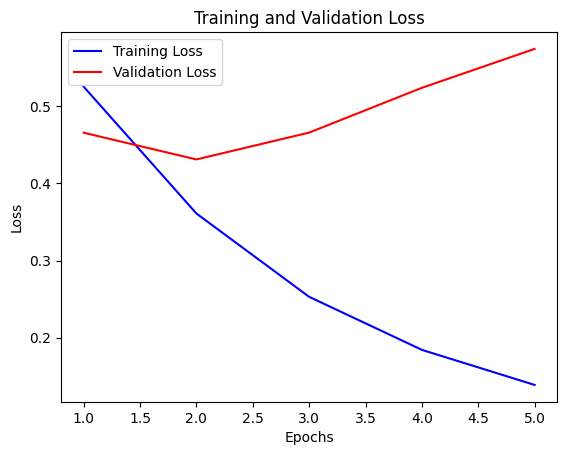

In [9]:
plot_history(history)

In [11]:
model_LSTM = Sequential([
    Embedding(10000, 32, input_length=100),
    LSTM(5, return_sequences=True),
    LSTM(5),
    Dense(1, activation='sigmoid')
])

model_LSTM.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 100, 32)           320000    
                                                                 
 lstm (LSTM)                 (None, 100, 5)            760       
                                                                 
 lstm_1 (LSTM)               (None, 5)                 220       
                                                                 
 dense_1 (Dense)             (None, 1)                 6         
                                                                 
Total params: 320986 (1.22 MB)
Trainable params: 320986 (1.22 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [12]:
model_LSTM.compile(optimizer='adam' , loss='binary_crossentropy' ,metrics=['accuracy'])

In [13]:
history_LSTM = model_LSTM.fit(x_train, y_train, epochs=5, batch_size=32, validation_split=0.2)

Epoch 1/5
625/625 [==============================] - 59s 87ms/step - loss: 0.4628 - accuracy: 0.7813 - val_loss: 0.3766 - val_accuracy: 0.8444
Epoch 2/5
625/625 [==============================] - 44s 70ms/step - loss: 0.2817 - accuracy: 0.8896 - val_loss: 0.3679 - val_accuracy: 0.8398
Epoch 3/5
625/625 [==============================] - 47s 76ms/step - loss: 0.2074 - accuracy: 0.9240 - val_loss: 0.3936 - val_accuracy: 0.8390
Epoch 4/5
625/625 [==============================] - 43s 69ms/step - loss: 0.1421 - accuracy: 0.9522 - val_loss: 0.4567 - val_accuracy: 0.8312
Epoch 5/5
625/625 [==============================] - 44s 71ms/step - loss: 0.1026 - accuracy: 0.9675 - val_loss: 0.5508 - val_accuracy: 0.8282


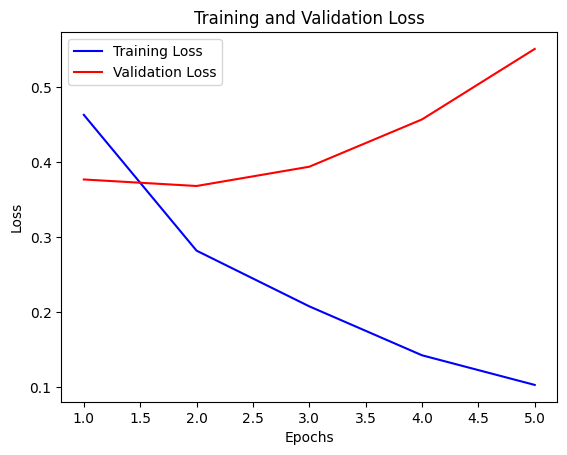

In [15]:
plot_history(history_LSTM)

In [16]:
model_GRU = Sequential([
    Embedding(10000, 32, input_length=100),
    GRU(5, return_sequences=True),
    GRU(5),
    Dense(1, activation='sigmoid')
])

model_GRU.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 100, 32)           320000    
                                                                 
 gru (GRU)                   (None, 100, 5)            585       
                                                                 
 gru_1 (GRU)                 (None, 5)                 180       
                                                                 
 dense_2 (Dense)             (None, 1)                 6         
                                                                 
Total params: 320771 (1.22 MB)
Trainable params: 320771 (1.22 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [17]:
model_GRU.compile(optimizer='adam' , loss='binary_crossentropy' ,metrics=['accuracy'])

In [18]:
history_GRU = model_GRU.fit(x_train, y_train, epochs=5, batch_size=32, validation_split=0.2)

Epoch 1/5
625/625 [==============================] - 62s 91ms/step - loss: 0.4964 - accuracy: 0.7534 - val_loss: 0.4044 - val_accuracy: 0.8226
Epoch 2/5
625/625 [==============================] - 51s 81ms/step - loss: 0.2810 - accuracy: 0.8905 - val_loss: 0.3648 - val_accuracy: 0.8426
Epoch 3/5
625/625 [==============================] - 46s 74ms/step - loss: 0.2023 - accuracy: 0.9276 - val_loss: 0.3982 - val_accuracy: 0.8384
Epoch 4/5
625/625 [==============================] - 45s 72ms/step - loss: 0.1451 - accuracy: 0.9533 - val_loss: 0.4912 - val_accuracy: 0.8274
Epoch 5/5
625/625 [==============================] - 45s 72ms/step - loss: 0.1075 - accuracy: 0.9662 - val_loss: 0.5071 - val_accuracy: 0.8310


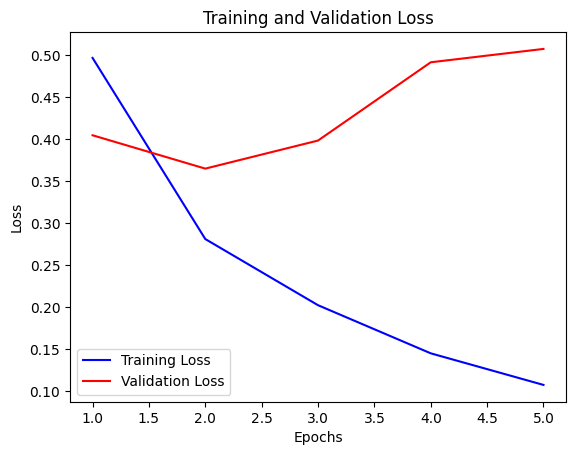

In [19]:
plot_history(history_GRU)